# BigMart Sales Prediction

## Project Overview
This project aims to predict **sales for BigMart outlets** using historical sales data from 2013. The dataset includes information on **1559 products** across **10 stores** in different cities. Using this predictive model, BigMart can identify key factors that impact sales and improve its inventory and marketing strategies.

Since some stores might not have complete data due to technical issues, we performed data cleaning and preprocessing to handle missing values.

---

## Data Description

### **1. Train Dataset (8523 records)**
This dataset contains past sales data, including both input features and the target variable `Item_Outlet_Sales`, which we aim to predict.

| **Variable**               | **Description** |
|----------------------------|----------------|
| **Item_Identifier**        | Unique product ID |
| **Item_Weight**            | Weight of the product |
| **Item_Fat_Content**       | Whether the product is low-fat or regular |
| **Item_Visibility**        | The percentage of total display area allocated to the product |
| **Item_Type**              | Category of the product |
| **Item_MRP**               | Maximum Retail Price of the product |
| **Outlet_Identifier**      | Unique store ID |
| **Outlet_Establishment_Year** | Year the store was established |
| **Outlet_Size**            | Size of the store (Small, Medium, Large) |
| **Outlet_Location_Type**   | Type of city (Tier 1, Tier 2, Tier 3) |
| **Outlet_Type**            | Type of store (Grocery store, Supermarket Type 1, 2, or 3) |
| **Item_Outlet_Sales**      | Sales of the product at the particular store (Target Variable) |

---

### **2. Test Dataset (5681 records)**
This dataset contains all the input variables except for the `Item_Outlet_Sales`, which needs to be predicted.

| **Variable**               | **Description** |
|----------------------------|----------------|
| **Item_Identifier**        | Unique product ID |
| **Item_Weight**            | Weight of the product |
| **Item_Fat_Content**       | Whether the product is low-fat or regular |
| **Item_Visibility**        | The percentage of total display area allocated to the product |
| **Item_Type**              | Category of the product |
| **Item_MRP**               | Maximum Retail Price of the product |
| **Outlet_Identifier**      | Unique store ID |
| **Outlet_Establishment_Year** | Year the store was established |
| **Outlet_Size**            | Size of the store (Small, Medium, Large) |
| **Outlet_Location_Type**   | Type of city (Tier 1, Tier 2, Tier 3) |
| **Outlet_Type**            | Type of store (Grocery store, Supermarket Type 1, 2, or 3) |

---

## **Data Cleaning and Preprocessing (Excel)**
### **1. Handling Missing Values**
- **`Item_Weight`**: Filled missing values using the average weight of similar products.
- **`Outlet_Size`**: Imputed missing values based on store type and location.

### **2. Standardizing Data Formats**
- Corrected inconsistencies in `Item_Fat_Content` (merged "low fat" and "LF" into "Low Fat").
- Converted `Outlet_Establishment_Year` to store age using:  
  `Store Age = Current Year - Outlet_Establishment_Year`.

### **3. Feature Engineering**
- **Total Revenue Calculation**:  
  `Total Revenue = Item_MRP * Item_Outlet_Sales`.
- **Product Visibility Correction**: Replaced `0` values with the median of similar products.
- **Store Age Grouping**: Categorized stores into "New," "Moderate," and "Old" based on their establishment year.

---

## **Data Analysis and Visualization (Excel)**
### **1. Sales Insights**
- Used **Pivot Tables** to analyze sales by **Store Type**, **Location**, and **Product Category**.
- Created **Bar Charts** and **Pie Charts** to visualize:
  - Sales distribution across stores
  - Product-wise revenue contribution
  - Customer preferences by product type

### **2. Sales Forecasting**
- Applied **Moving Average Trend Analysis** to predict future sales.
- Used **Excel Forecast Sheet** to make time-series predictions based on historical data.

---

## **Final Submission Format**
| **Variable**          | **Description** |
|----------------------|----------------|
| **Item_Identifier** | Unique product ID |
| **Outlet_Identifier** | Unique store ID |
| **Item_Outlet_Sales** | Predicted sales at the store |

The final predictions are saved in an Excel sheet for submission.

---

## **Tools Used**
- **Microsoft Excel**
  - Data Cleaning (Removing duplicates, handling missing values)
  - Statistical Analysis (Descriptive statistics, trend analysis)
  - Forecasting (Moving averages, trend lines)
  - Data Visualization (Charts, Pivot Tables, Conditional Formatting)

---

## **Conclusion**
This project provides a structured approach to predicting sales using Excel. The analysis helps identify key sales drivers and optimize sales strategies for BigMart stores.

https://github.com/12ashwani/big_mart_sales.git

# loading the Data from the Directory

In [1]:
import numpy as np
import pandas as pd 


In [3]:
df=pd.read_csv("train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis(EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

In [8]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Checking the Duplicated values into the data frame

In [9]:
df.duplicated().sum()

0

#### Checking null values into  the Dataframe

In [10]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Fill the all mising values by using the simple Imputer. For Numerical using the median and for categorical using the most_frequent data

In [11]:
def data_cleaning(df):
  df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
  df['Outlet_Size'] = df['Outlet_Size'].fillna('Small')
  # Replace zero Item_Visibility values with the mean
  df.loc[df["Item_Visibility"] == 0, "Item_Visibility"] = df["Item_Visibility"].mean()
  df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}) #Standardize Item_Fat_Content labels


  return df
clean_data=data_cleaning(df)
clean_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
clean_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
def creating_new_features(df):
    df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']  # Create new feature Outlet_Age
    df['Price_Per_Weight'] = df['Item_MRP'] / (df['Item_Weight'] + 1)  # +1 to avoid division by zero

    # Interaction Features
    df["MRP_per_Outlet_Age"] = df["Item_MRP"] / (df["Outlet_Age"] + 1)  # Avoid division by zero
    df["MRP_Visibility_Interaction"] = df["Item_MRP"] * df["Item_Visibility"]
    df["Weight_Visibility_Interaction"] = df["Item_Weight"] * df["Item_Visibility"]

    return df

# Apply function to the dataset
new_features_data = creating_new_features(clean_data)

# Display the first few rows
new_features_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Price_Per_Weight,MRP_per_Outlet_Age,MRP_Visibility_Interaction,Weight_Visibility_Interaction
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,26,24.253320,9.252193,4.008763,0.149240
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,16,6.975318,2.839365,0.930544,0.114127
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,26,7.655027,5.245111,2.373528,0.293301
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,27,9.014604,6.503393,12.042312,1.269735
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,38,5.424109,1.381062,3.561964,0.590559


## Analysing the Data By using the some visualization

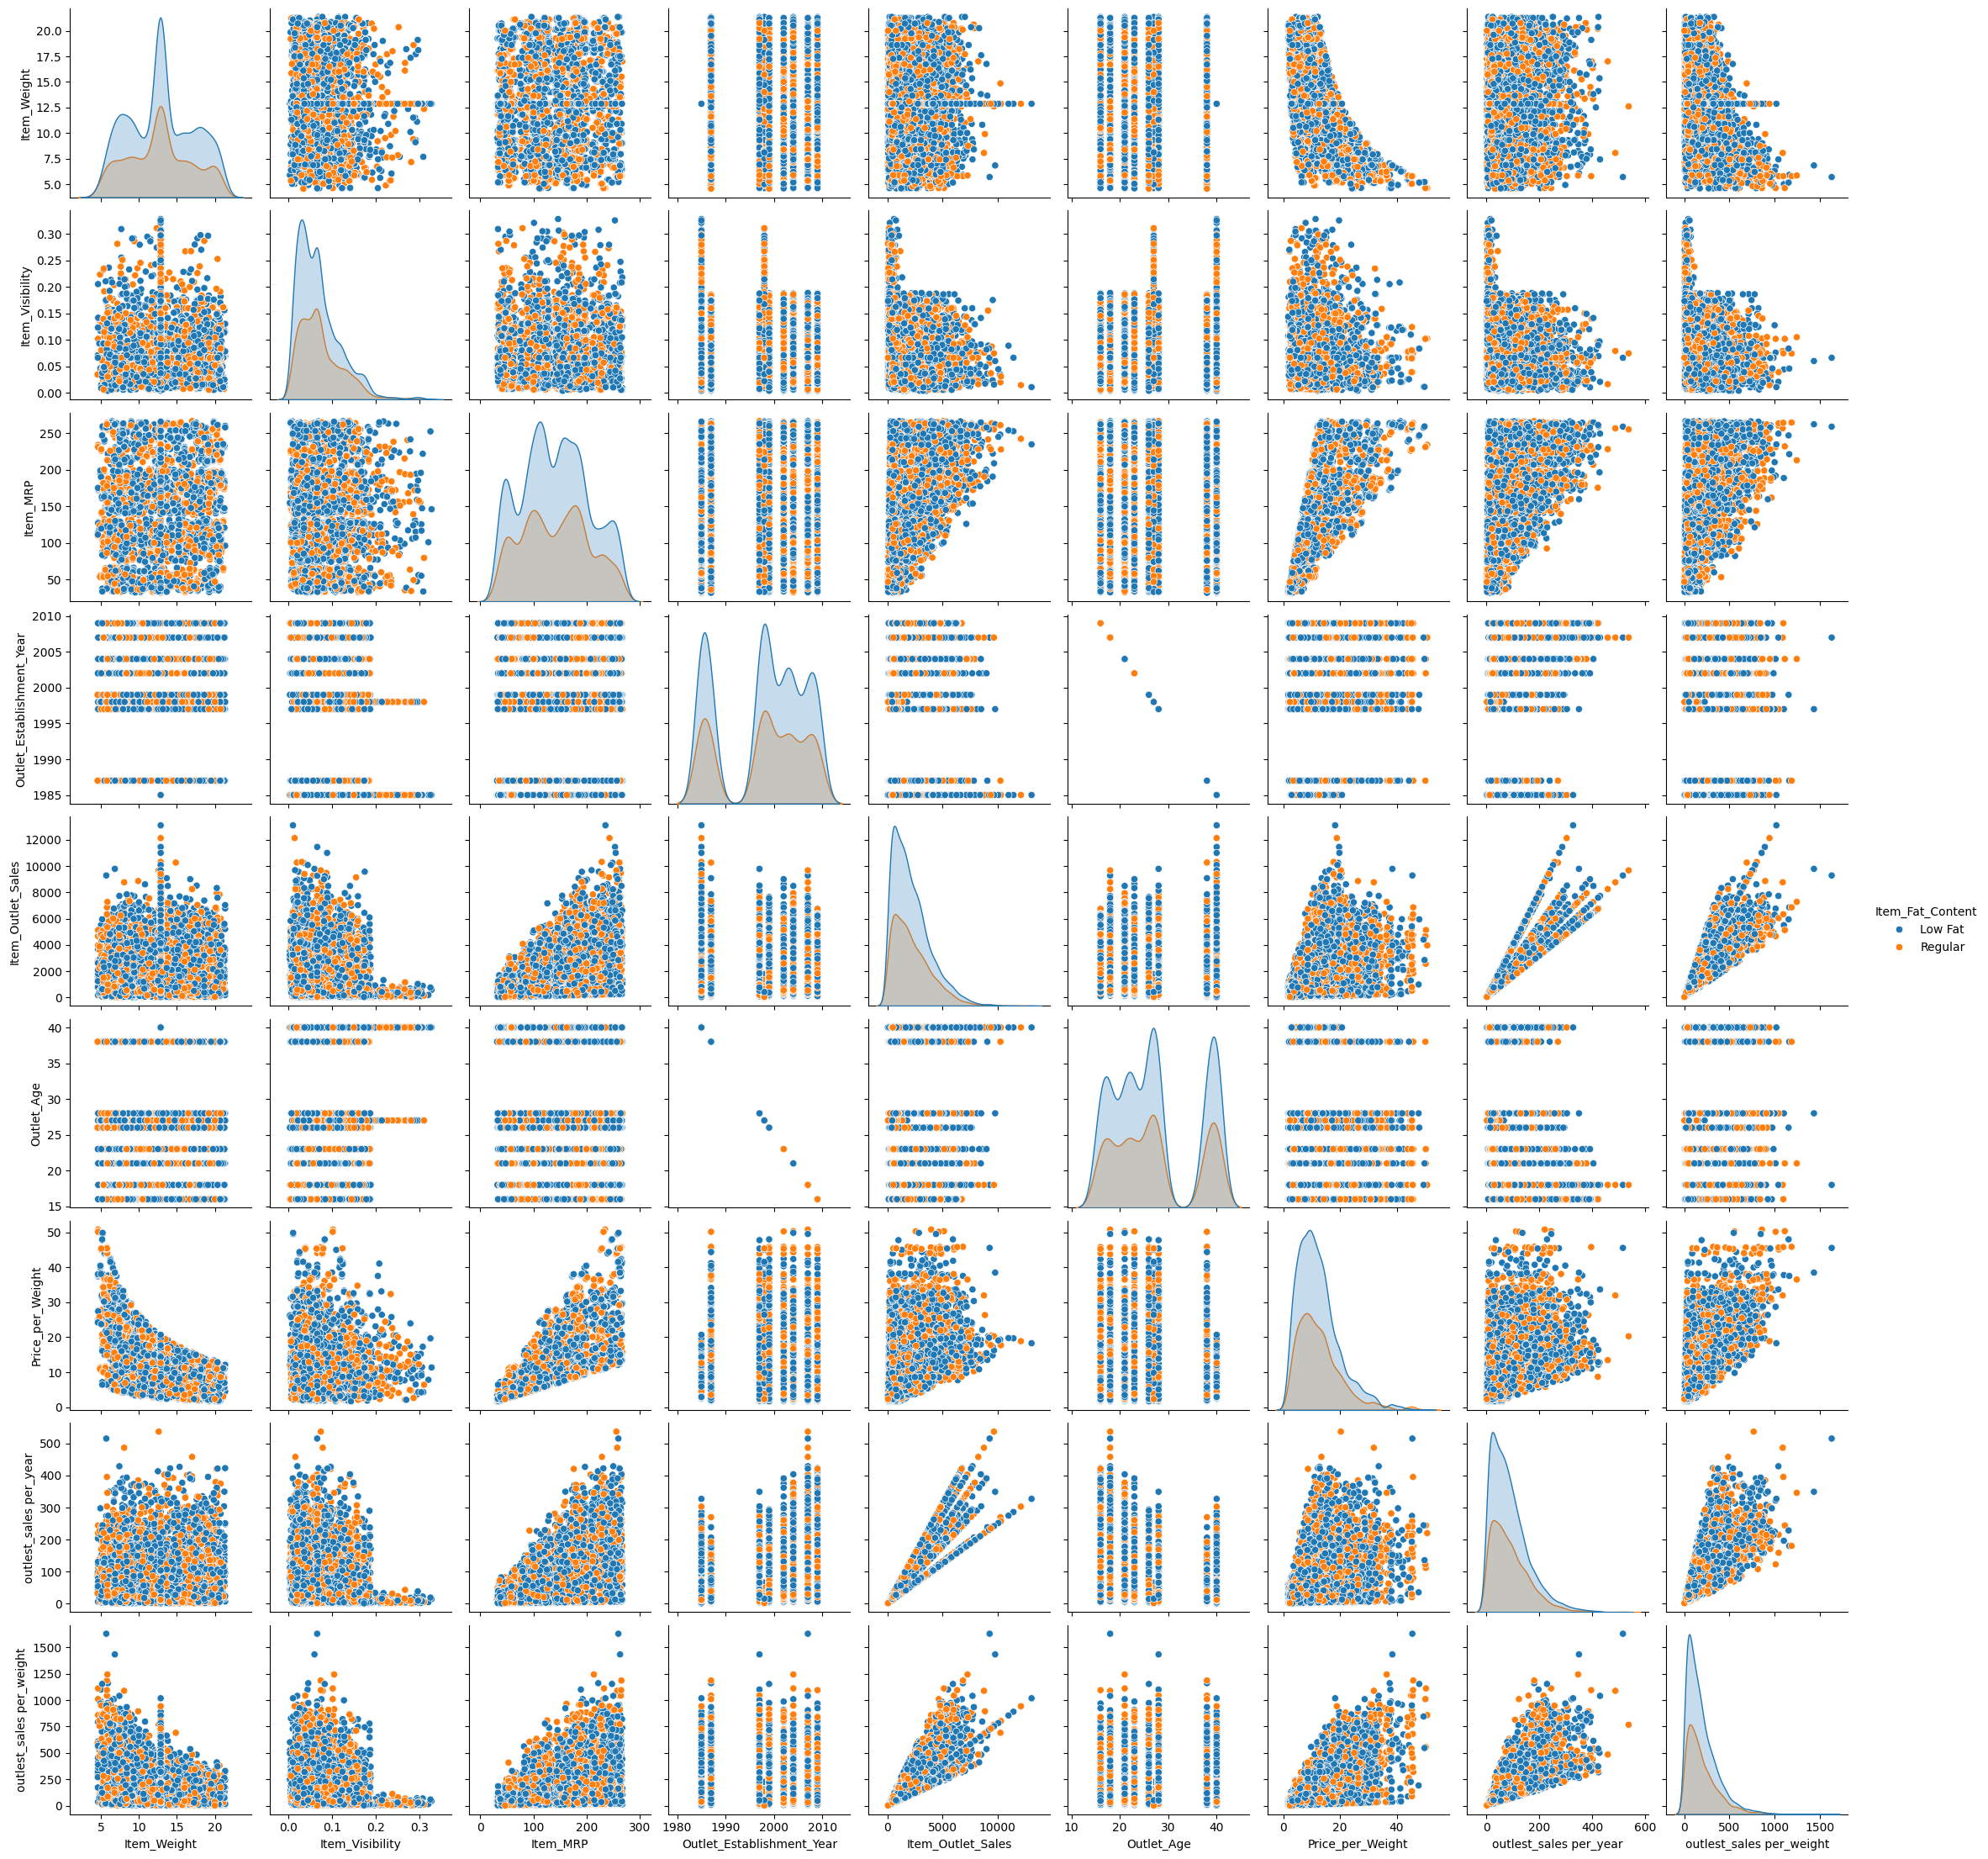

In [ ]:
import seaborn as sns
sns.pairplot(new_features_data, hue='Item_Fat_Content')

In [13]:
! pip install ydata_profiling

In [104]:
from ydata_profiling import ProfileReport
profile = ProfileReport(new_features_data, title="Pandas Profiling Report")
profile.to_file("output.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]


<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

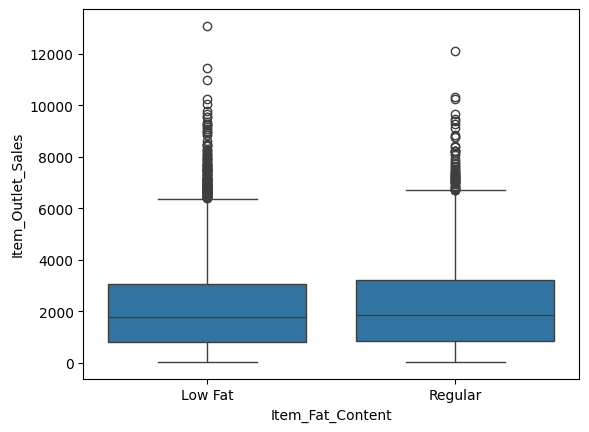

In [21]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=new_features_data)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

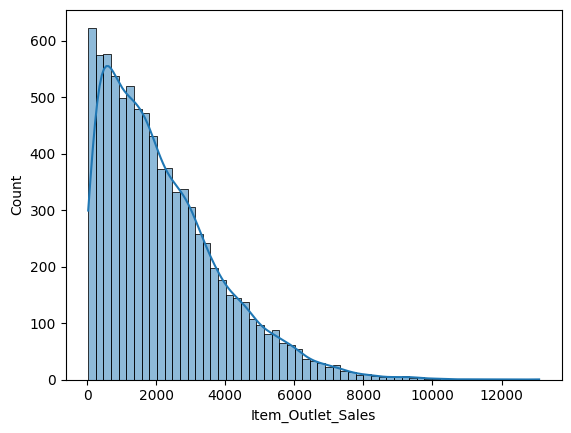

In [22]:
sns.histplot(new_features_data['Item_Outlet_Sales'], kde=True)

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

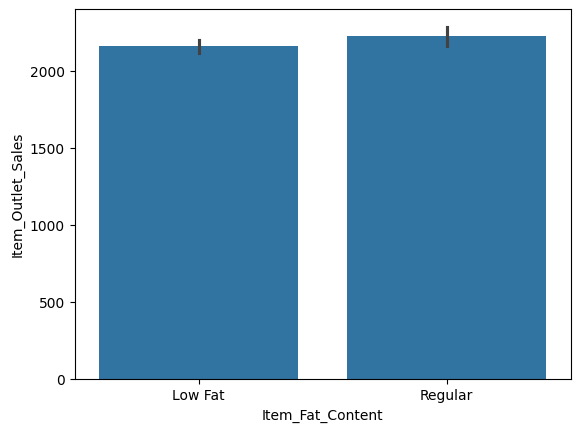

In [23]:
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=new_features_data)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

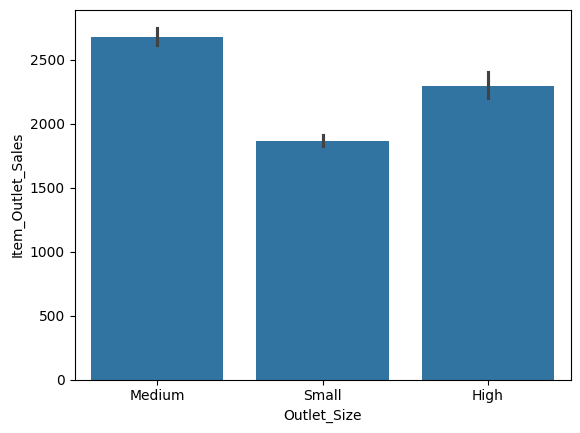

In [24]:
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=new_features_data)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

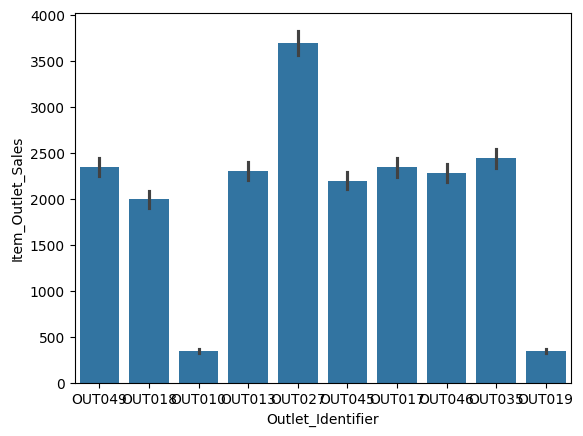

In [25]:
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=new_features_data)

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

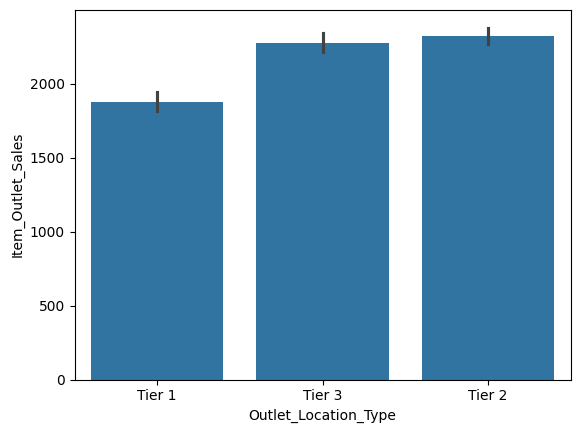

In [26]:
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=new_features_data)

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

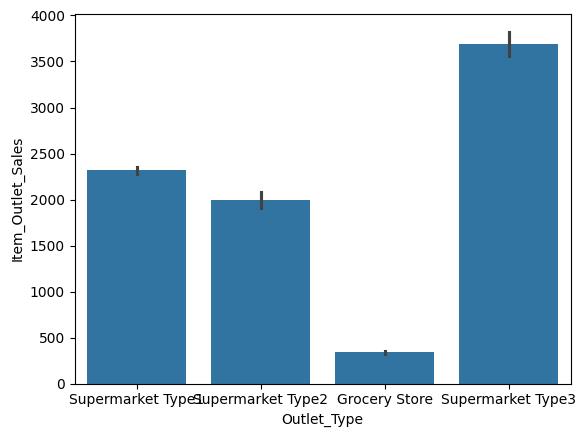

In [27]:
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=new_features_data)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

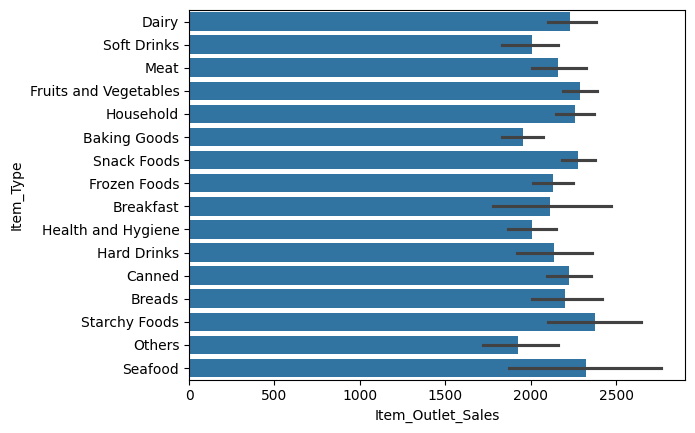

In [28]:
sns.barplot(y='Item_Type', x='Item_Outlet_Sales',data=new_features_data)

In [14]:
X=new_features_data.drop(['Item_Outlet_Sales','Item_Identifier'],axis=1)
y = new_features_data["Item_Outlet_Sales"]

In [15]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Price_Per_Weight,MRP_per_Outlet_Age,MRP_Visibility_Interaction,Weight_Visibility_Interaction
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,26,24.253320,9.252193,4.008763,0.149240
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,16,6.975318,2.839365,0.930544,0.114127
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,26,7.655027,5.245111,2.373528,0.293301
3,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,27,9.014604,6.503393,12.042312,1.269735
4,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,38,5.424109,1.381062,3.561964,0.590559


In [16]:
X.shape

(8523, 15)

In [17]:
categorical_features=X.select_dtypes(include='object').columns
numerical_features=X.select_dtypes(exclude='object').columns

In [18]:
X[categorical_features].describe()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523
unique,2,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Small,Tier 3,Supermarket Type1
freq,5517,1232,935,4798,3350,5577


In [19]:
X[numerical_features]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age,Price_Per_Weight,MRP_per_Outlet_Age,MRP_Visibility_Interaction,Weight_Visibility_Interaction
0,9.300,0.016047,249.8092,1999,26,24.253320,9.252193,4.008763,0.149240
1,5.920,0.019278,48.2692,2009,16,6.975318,2.839365,0.930544,0.114127
2,17.500,0.016760,141.6180,1999,26,7.655027,5.245111,2.373528,0.293301
3,19.200,0.066132,182.0950,1998,27,9.014604,6.503393,12.042312,1.269735
4,8.930,0.066132,53.8614,1987,38,5.424109,1.381062,3.561964,0.590559
...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,38,27.275499,5.500559,12.181275,0.389818
8519,8.380,0.046982,108.1570,2002,23,11.530597,4.506542,5.081479,0.393713
8520,10.600,0.035186,85.1224,2004,21,7.338138,3.869200,2.995140,0.372974
8521,7.210,0.145221,103.1332,2009,16,12.561900,6.066659,14.977070,1.047041


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [134]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd

def encoding_and_standardized_data(df):
    # Identify categorical and numerical features
    categorical_features = df.select_dtypes(include='object').columns
    numerical_features = df.select_dtypes(exclude='object').columns

    # Separate features for LabelEncoder and OneHotEncoder
    OneHotEncoder_list = []  # List for OneHotEncoder
    LabelEncoder_list = []   # List for LabelEncoder

    # Identify categorical columns
    for col in categorical_features:
        if df[col].nunique() < 5:
            LabelEncoder_list.append(col)
        else:
            OneHotEncoder_list.append(col)

    # Apply OneHotEncoder to the specified columns
    one = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = one.fit_transform(df[OneHotEncoder_list])

    # Get feature names for the encoded data
    feature_names = one.get_feature_names_out(OneHotEncoder_list)

    # Create a DataFrame for the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=df.index)

    # Concatenate the encoded DataFrame with the original DataFrame
    df = pd.concat([df, encoded_df], axis=1)

    # Apply LabelEncoder to the specified columns
    label = LabelEncoder()
    for col in LabelEncoder_list:
        df[col] = df[col].fillna("Unknown")  # Handle missing values
        df[col] = label.fit_transform(df[col])

    # Drop the original categorical columns that were OneHotEncoded
    df.drop(OneHotEncoder_list, axis=1, inplace=True)

    # Standardize numerical features
    # scaler = StandardScaler()
    # df[numerical_features] = scaler.fit_transform(df[numerical_features])

    return df

In [135]:
Encoding_X=encoding_and_standardized_data(X)
Encoding_X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,estimated_sales_per_year,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,1999,1,0,1,26,9.103720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.92,1,0.019278,48.2692,2009,1,2,2,16,2.784627,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.50,0,0.016760,141.6180,1999,1,0,1,26,5.157203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,19.20,1,0.066132,182.0950,1998,2,2,0,27,6.073310,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,0,0.066132,53.8614,1987,0,2,1,38,1.289729,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
! pip install tensorflow

In [137]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def best_model(X, y):
    # Define traditional ML models
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "RandomForestRegressor": RandomForestRegressor(),
        "GradientBoostingRegressor": GradientBoostingRegressor(),
        "AdaBoostRegressor": AdaBoostRegressor(),
        "ExtraTreesRegressor": ExtraTreesRegressor(),
        "SVR": SVR(),
        "KNeighborsRegressor": KNeighborsRegressor(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Store R² scores
    r2_scores = {}

    # Evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores[name] = r2_score(y_test, y_pred)

    # Add Deep Learning Model
    def build_nn():
        model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
            Dense(32, activation='relu'),
            Dense(1)  # Output layer for regression
        ])
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    nn_model = build_nn()
    nn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    y_pred_nn = nn_model.predict(X_test).flatten()
    r2_scores["NeuralNetwork"] = r2_score(y_test, y_pred_nn)

    # Convert R² scores to DataFrame
    r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'R2_Score'])

    # Find the best model
    best_model_name = r2_df.loc[r2_df['R2_Score'].idxmax(), 'Model']
    best_model_score = r2_df.loc[r2_df['R2_Score'].idxmax(), 'R2_Score']

    print("R² Scores for All Models:")
    print(r2_df)
    print(f"\nBest Model: {best_model_name} with R² Score: {best_model_score}")

    return best_model_name, r2_df


In [138]:
best_modele,list_off_model=best_model(Encoding_X,y)
list_off_model

e:\Users\Ashwani\anaconda3\envs\big_mart\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.041e+08, tolerance: 2.243e+06
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2097
[LightGBM] [Info] Number of data points in the train set: 7670, number of used features: 40
[LightGBM] [Info] Start training from score 2187.156299


e:\Users\Ashwani\anaconda3\envs\big_mart\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
R² Scores for All Models:
                        Model  R2_Score
0            LinearRegression  0.579746
1                       Ridge  0.579828
2                       Lasso  0.579928
3                  ElasticNet  0.496260
4       DecisionTreeRegressor  0.182505
5       RandomForestRegressor  0.598216
6   GradientBoostingRegressor  0.621931
7           AdaBoostRegressor  0.484544
8         ExtraTreesRegressor  0.564374
9                         SVR -0.034483
10        KNeighborsRegressor  0.390462
11               XGBRegressor  0.581260
12              LGBMRegressor  0.612151
13              NeuralNetwork  0.610491

Best Model: GradientBoostingRegressor with R² Score: 0.6219314170080695


,Model,R2_Score
0,LinearRegression,0.579746
1,Ridge,0.579828
2,Lasso,0.579928
3,ElasticNet,0.496260
4,DecisionTreeRegressor,0.182505
5,RandomForestRegressor,0.598216
6,GradientBoostingRegressor,0.621931
7,AdaBoostRegressor,0.484544
8,ExtraTreesRegressor,0.564374
9,SVR,-0.034483


In [139]:
list_off_model.head()

,Model,R2_Score
0,LinearRegression,0.579746
1,Ridge,0.579828
2,Lasso,0.579928
3,ElasticNet,0.496260
4,DecisionTreeRegressor,0.182505


In [140]:
X_train, X_test, y_train, y_test = train_test_split(Encoding_X, y, test_size=0.2, random_state=42)

In [141]:
best_rf=RandomForestRegressor(n_estimators=50,min_samples_leaf=4,min_samples_split=5,random_state=42,max_depth=10)
best_rf.fit(X_train,y_train)
y_pred=best_rf.predict(X_test)
r2_score(y_test,y_pred)

0.6155947665816794

In [142]:
grad_model=GradientBoostingRegressor()
grad_model.fit(X_train,y_train)
y_pred=grad_model.predict(X_test)
r2_score(y_test,y_pred)

0.6101262288390706

In [143]:
import pickle
# Save the model as a pickle file
filename = 'model_rf.pkl'
pickle.dump(best_rf, open(filename, 'wb'))


In [144]:
# select the best feature give me the best feature_names list

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, X):
    # Get feature importances from the trained model
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [X.columns[i] for i in indices]

    # Create plot
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), names, rotation=90)
    plt.tight_layout()
    plt.show()
    return names #return feature names


# Example usage (assuming 'best_rf' is your trained RandomForestRegressor and X_train is your training data):
feature_names = plot_feature_importances(best_rf, X_train)
print(f"Best features: {feature_names[:10]}") # Print top 5 features


Best features: ['Item_MRP', 'Outlet_Type', 'estimated_sales_per_year', 'Outlet_Identifier_OUT027', 'Outlet_Age', 'MRP_per_Outlet_Age', 'Price_Per_Weight', 'Weight_Visibility_Interaction', 'MRP_Visibility_Interaction', 'Item_Visibility']


C:\Users\admin\AppData\Local\Temp\ipykernel_11932\3298221938.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [45]:
class Abc:
    def __init__(self,a):
        self.b=a
    def add(self,c):
        return self.b+c
    def sub(self,d):

        return self.b-d
obj=Abc(5)

In [46]:
obj.add(6)

11

In [2]:
class SS:
    def __init__(self,a):
        self.a=a
    def add(self,c):
        return self.a+c
    def sub(self,d):

        return self.b-d

In [3]:
obj=SS(5)

In [1]:
import sklearn
print(sklearn.__version__)


1.6.1
